In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import venn as venn
%matplotlib inline

In [2]:
df = pd.read_csv('w2v_nonnorm_LLPS_PDB_RF.csv', sep='\t')

In [3]:
df = df[df['Category']=='Swiss-Prot']

In [4]:
df

,prediction,Uniprot_ID,Category
0,1.0,Q96E39,Swiss-Prot
1,1.0,O95948,Swiss-Prot
2,1.0,Q9P242,Swiss-Prot
5,1.0,P19532,Swiss-Prot
17,1.0,P78424,Swiss-Prot
...,...,...,...
20651,0.0,Q9Y3D8,Swiss-Prot
20652,0.0,A6NEY8,Swiss-Prot
20653,0.0,P18077,Swiss-Prot
20654,0.0,Q8NE65,Swiss-Prot


In [5]:
df=df.drop(['Category'], axis = 1)
df

,prediction,Uniprot_ID
0,1.0,Q96E39
1,1.0,O95948
2,1.0,Q9P242
5,1.0,P19532
17,1.0,P78424
...,...,...
20651,0.0,Q9Y3D8
20652,0.0,A6NEY8
20653,0.0,P18077
20654,0.0,Q8NE65


In [6]:
df.index = df['Uniprot_ID']
df

,prediction,Uniprot_ID
Uniprot_ID,,
Q96E39,1.0,Q96E39
O95948,1.0,O95948
Q9P242,1.0,Q9P242
P19532,1.0,P19532
P78424,1.0,P78424
...,...,...
Q9Y3D8,0.0,Q9Y3D8
A6NEY8,0.0,A6NEY8
P18077,0.0,P18077


In [7]:
df=df.drop(['Uniprot_ID'], axis=1)
df

,prediction
Uniprot_ID,
Q96E39,1.0
O95948,1.0
Q9P242,1.0
P19532,1.0
P78424,1.0
...,...
Q9Y3D8,0.0
A6NEY8,0.0
P18077,0.0


In [26]:
df.columns=['w2v_LLPS_PDB_RF']
df

,w2v_LLPS_PDB_RF
P09651,1.000
P38159,1.000
Q16630,0.995
O75177,0.995
Q07666,0.995
...,...
P62310,0.025
O15116,0.025
Q9UK45,0.015
Q12988,0.005


In [28]:
df1 = pd.read_csv('w2v_nonnorm_LLPS_LLPS_RF.csv', '\t')
df1

,prediction,Uniprot_ID,Category
0,1.000,P35637,LLPS+
1,1.000,P35637,LLPS+
2,1.000,P35637,LLPS+
3,1.000,P35637,LLPS+
4,0.995,P35637,LLPS+
...,...,...,...
20653,0.025,A0PJZ0,Swiss-Prot
20654,0.025,Q96HR3,Swiss-Prot
20655,0.020,P10067,LLPS-
20656,0.015,P07315,Swiss-Prot


In [29]:
df1 = df1[df1['Category']=='Swiss-Prot']
df1.index = df1['Uniprot_ID']
df1=df1.drop(['Category', 'Uniprot_ID'], axis = 1)
df1.columns = ['w2v_LLPS_LLPS_RF']
df1


,w2v_LLPS_LLPS_RF
Uniprot_ID,
P09651,0.980
Q92804,0.950
Q9Y2H0,0.940
Q9P2N5,0.940
Q96EP5,0.940
...,...
Q86V88,0.025
Q9BYD1,0.025
A0PJZ0,0.025


In [11]:
df2 = pd.read_csv('Phys_features_LLPS_PDB_RF.csv', '\t')
df2 = df2[df2['Category']=='Swiss-Prot']
df2.index = df2['Uniprot_ID']
df2=df2.drop(['Category', 'Uniprot_ID'], axis = 1)
df2.columns = ['LLPS_PDB']
df2

,LLPS_PDB_LgR
Uniprot_ID,
Q13435,1.0
Q9UFB7,1.0
A8MQT2,1.0
Q5SYE7,1.0
Q17RW2,1.0
...,...
P18859,0.0
Q99574,0.0
P59768,0.0


In [12]:
df3 = pd.read_csv('Phys_features_LLPS_LLPS_RF.csv', '\t')
df3 = df3[df3['Category']=='Swiss-Prot']
df3.index = df3['Uniprot_ID']
df3=df3.drop(['Category', 'Uniprot_ID'], axis = 1)
df3.columns = ['LLPS_LLPS_LgR']
df3

,LLPS_LLPS_LgR
Uniprot_ID,
Q8NDT2,0.99
Q96BA8,0.99
Q9H4Z2,0.99
P98175,0.99
Q5VZP5,0.99
...,...
Q96CG3,0.01
Q9UDW3,0.00
B2RV13,0.00


In [13]:
exs = pd.read_excel('Reviewed Data V1.3.xlsx')

In [14]:
exs.index = exs['UniprotEntry']


In [15]:
index_intersection = df.index.intersection(exs.index.unique())
index_intersection1 = df1.index.intersection(exs.index.unique())
index_intersection2 = df2.index.intersection(exs.index.unique())
index_intersection3 = df3.index.intersection(exs.index.unique())


In [16]:
df=df.loc[index_intersection]
df1=df1.loc[index_intersection1]
df2=df2.loc[index_intersection2]
df3=df3.loc[index_intersection3]

In [17]:
proteins = df.join(df1, how = 'outer')
proteins = proteins.join(df2, how = 'outer')
proteins = proteins.join(df3, how = 'outer')
proteins

,LLPS_PDB_RF,LLPS_LLPS_RF,LLPS_PDB_LgR,LLPS_LLPS_LgR
O00401,0.990,0.830,1.00,0.80
O14641,0.980,0.905,1.00,0.90
O15116,0.025,0.230,0.00,0.26
O15169,0.915,0.760,0.95,0.69
O15550,0.870,0.760,0.90,0.59
...,...,...,...,...
Q9Y3R0,0.875,0.790,0.96,0.62
Q9Y4Y9,0.040,0.685,0.00,0.22
Q9Y4Z0,0.115,0.235,0.72,0.34
Q9Y580,0.760,0.480,0.88,0.44


In [18]:
men_with_venn = proteins.applymap(lambda x:x>=0.5)
men_with_venn

,LLPS_PDB_RF,LLPS_LLPS_RF,LLPS_PDB_LgR,LLPS_LLPS_LgR
O00401,True,True,True,True
O14641,True,True,True,True
O15116,False,False,False,False
O15169,True,True,True,True
O15550,True,True,True,True
...,...,...,...,...
Q9Y3R0,True,True,True,True
Q9Y4Y9,False,True,False,False
Q9Y4Z0,False,False,True,False
Q9Y580,True,False,True,False


In [19]:
proteins[men_with_venn['LLPS_PDB_RF']]

,LLPS_PDB_RF,LLPS_LLPS_RF,LLPS_PDB_LgR,LLPS_LLPS_LgR
O00401,0.990,0.830,1.00,0.80
O14641,0.980,0.905,1.00,0.90
O15169,0.915,0.760,0.95,0.69
O15550,0.870,0.760,0.90,0.59
O43390,0.980,0.755,1.00,0.95
...,...,...,...,...
Q9UPQ9,0.940,0.815,1.00,0.80
Q9UQ35,0.920,0.850,0.92,0.65
Q9Y3R0,0.875,0.790,0.96,0.62
Q9Y580,0.760,0.480,0.88,0.44


In [20]:
a=set(proteins[men_with_venn['LLPS_PDB_RF']]['LLPS_PDB_RF'].index.array)
b=set(proteins[men_with_venn['LLPS_LLPS_RF']]['LLPS_LLPS_RF'].index.array)
c=set(proteins[men_with_venn['LLPS_PDB_LgR']]['LLPS_PDB_LgR'].index.array)
d=set(proteins[men_with_venn['LLPS_LLPS_LgR']]['LLPS_LLPS_LgR'].index.array)

/Users/delta/opt/anaconda3/lib/python3.8/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/Users/delta/opt/anaconda3/lib/python3.8/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


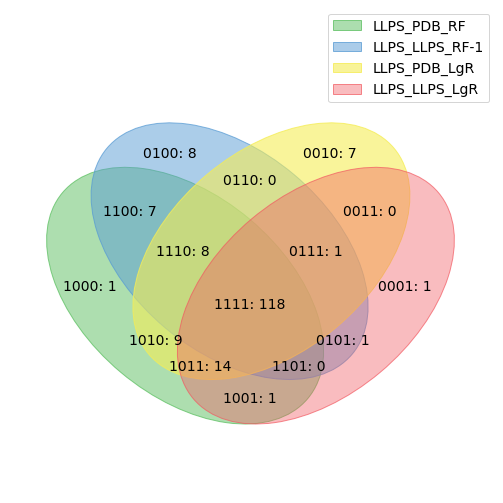

In [21]:
labels = venn.get_labels([a,b,c,d], fill=['number', 'logic'])
fig, ax = venn.venn4(labels, names=['LLPS_PDB_RF', 'LLPS_LLPS_RF-1', 'LLPS_PDB_LgR', 'LLPS_LLPS_LgR'])
plt.savefig('men_with_venn.png')

In [22]:
e = set(proteins['LLPS_PDB_RF'].index.array)

/Users/delta/opt/anaconda3/lib/python3.8/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn((


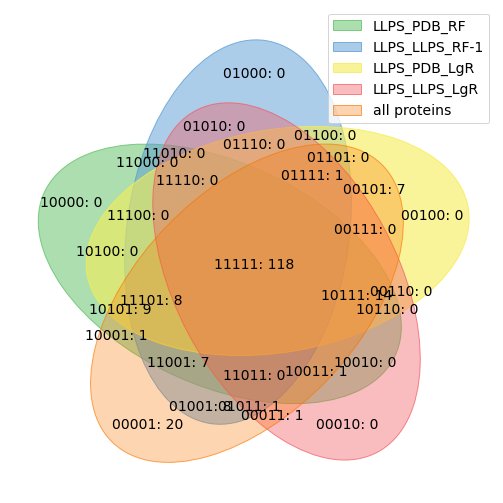

In [23]:
labels = venn.get_labels([a,b,c,d,e], fill=['number', 'logic'])
fig, ax = venn.venn5(labels, names=['LLPS_PDB_RF', 'LLPS_LLPS_RF-1', 'LLPS_PDB_LgR', 'LLPS_LLPS_LgR', 'all proteins'])
plt.savefig('man_with_a_van.png')

In [24]:
total=men_with_venn.sum(axis=1)
proteins['models working']=total
proteins

,LLPS_PDB_RF,LLPS_LLPS_RF,LLPS_PDB_LgR,LLPS_LLPS_LgR,models working
O00401,0.990,0.830,1.00,0.80,4
O14641,0.980,0.905,1.00,0.90,4
O15116,0.025,0.230,0.00,0.26,0
O15169,0.915,0.760,0.95,0.69,4
O15550,0.870,0.760,0.90,0.59,4
...,...,...,...,...,...
Q9Y3R0,0.875,0.790,0.96,0.62,4
Q9Y4Y9,0.040,0.685,0.00,0.22,1
Q9Y4Z0,0.115,0.235,0.72,0.34,1
Q9Y580,0.760,0.480,0.88,0.44,2


In [25]:
proteins[proteins['models working'] == 0]

,LLPS_PDB_RF,LLPS_LLPS_RF,LLPS_PDB_LgR,LLPS_LLPS_LgR,models working
O15116,0.025,0.230,0.00,0.26,0
O43791,0.335,0.420,0.02,0.27,0
O43809,0.030,0.220,0.00,0.03,0
P00441,0.180,0.205,0.17,0.24,0
P16333,0.300,0.460,0.24,0.38,0
P52298,0.065,0.105,0.35,0.28,0
P62993,0.050,0.215,0.20,0.30,0
P63244,0.195,0.425,0.00,0.17,0
P63279,0.110,0.120,0.13,0.29,0
Q06609,0.155,0.475,0.12,0.46,0
